
--- Financial Forecast Report (50,000 simulations) ---
Average Expected Profit: $-32,981.08
Probability of Loss: 56.55%
90% Confidence Interval (Profit): $-306,590.57 to $239,583.52


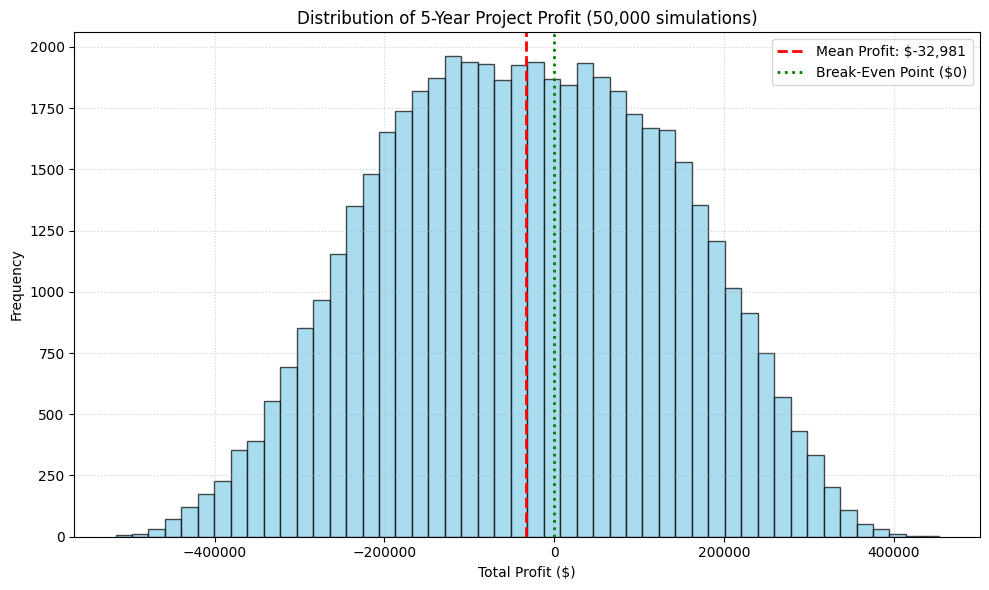

In [1]:
import random
import statistics
import matplotlib.pyplot as plt

def run_financial_forecast_with_viz(num_simulations=10000):
    """
    Runs a Monte Carlo simulation for a 5-year project forecast and visualizes the results.
    """
    profit_outcomes = []

    # Define distribution parameters
    INVEST_MEAN = 500000
    INVEST_STDEV = 30000

    REV_MIN = 200000
    REV_MAX = 300000

    COST_MIN = 120000
    COST_MAX = 200000
    COST_MODE = 150000

    for _ in range(num_simulations):
        initial_investment = random.normalvariate(INVEST_MEAN, INVEST_STDEV)
        annual_revenue = random.uniform(REV_MIN, REV_MAX)
        annual_op_cost = random.triangular(COST_MIN, COST_MAX, COST_MODE)

        profit = (annual_revenue - annual_op_cost) * 5 - initial_investment
        profit_outcomes.append(profit)

    # --- Analysis ---
    average_profit = statistics.mean(profit_outcomes)
    losses = sum(1 for p in profit_outcomes if p < 0)
    loss_probability = losses / num_simulations

    profit_outcomes.sort()
    percentile_5 = profit_outcomes[int(num_simulations * 0.05)]
    percentile_95 = profit_outcomes[int(num_simulations * 0.95)]

    # --- Print Report ---
    print(f"\n--- Financial Forecast Report ({num_simulations:,} simulations) ---")
    print(f"Average Expected Profit: ${average_profit:,.2f}")
    print(f"Probability of Loss: {loss_probability:.2%}")
    print(f"90% Confidence Interval (Profit): ${percentile_5:,.2f} to ${percentile_95:,.2f}")

    # --- Visualization (Histogram) ---
    plt.figure(figsize=(10, 6))
    plt.hist(profit_outcomes, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

    plt.axvline(average_profit, color='red', linestyle='dashed', linewidth=2,
                label=f'Mean Profit: ${average_profit:,.0f}')
    plt.axvline(0, color='green', linestyle=':', linewidth=2,
                label='Break-Even Point ($0)')

    plt.title(f"Distribution of 5-Year Project Profit ({num_simulations:,} simulations)")
    plt.xlabel("Total Profit ($)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.ticklabel_format(style='plain', axis='x') # Prevent scientific notation on x-axis
    plt.tight_layout()
    plt.show()

    return profit_outcomes

# --- Run the financial forecast with visualization ---
financial_profits_viz = run_financial_forecast_with_viz(num_simulations=50000) # Increased simulations for smoother histogram